<a href="https://colab.research.google.com/github/FEJTWOW/DataScience/blob/master/KoronaScienceRaport.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

KORONA SCIENCE RAPORT



In [0]:
import pandas as pd
from matplotlib import pyplot as plt
import numpy as np
import sklearn
from sklearn.linear_model import LinearRegression


In [0]:
url = f"https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_confirmed_global.csv"
df = pd.read_csv(url, error_bad_lines=False)
PKB = pd.read_csv('/content/data_csv2.csv', error_bad_lines=False)
deaths=pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv')
recorvered = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_recovered_global.csv')

b'Skipping line 6769: expected 4 fields, saw 5\nSkipping line 6770: expected 4 fields, saw 5\nSkipping line 6771: expected 4 fields, saw 5\nSkipping line 6772: expected 4 fields, saw 5\nSkipping line 6773: expected 4 fields, saw 5\nSkipping line 6774: expected 4 fields, saw 5\nSkipping line 6775: expected 4 fields, saw 5\nSkipping line 6776: expected 4 fields, saw 5\nSkipping line 6777: expected 4 fields, saw 5\nSkipping line 6778: expected 4 fields, saw 5\nSkipping line 6779: expected 4 fields, saw 5\nSkipping line 6780: expected 4 fields, saw 5\nSkipping line 6781: expected 4 fields, saw 5\nSkipping line 6782: expected 4 fields, saw 5\nSkipping line 6783: expected 4 fields, saw 5\nSkipping line 6784: expected 4 fields, saw 5\nSkipping line 6785: expected 4 fields, saw 5\nSkipping line 6786: expected 4 fields, saw 5\nSkipping line 6787: expected 4 fields, saw 5\nSkipping line 6788: expected 4 fields, saw 5\nSkipping line 6789: expected 4 fields, saw 5\nSkipping line 6790: expected 4 f

In [0]:
def read_and_clean_PKB():
  a = list(range(2308)) 
  PKB_good = PKB.drop(a).groupby("Country Name").max() # musze usunąć regiony oraz wybrać po jednym pkb dla danego kraju
  del PKB_good["Country Code"] # usuwam niepotrzebne dane
  del PKB_good["Year"] # -||-
  result = PKB_good.reset_index()
  return result

In [0]:
def countries_and_cases():
  countries = pd.DataFrame(df.iloc[:,1]) # biorę kolumnę z nazwami
  cases = pd.DataFrame(df.iloc[:,-1]) # biorę ostatnią kolumne z przypadkami
  result = countries.merge(cases, left_index=True, right_index=True) # łącze po indeksach
  result = result.set_axis([*result.columns[:-1], 'Cases'], axis=1, inplace=False) # zmieniam date na inna nazwe
  result = result.groupby("Country/Region").max() # grupuje bo sie powtarzaja
  result = result.reset_index() 
  return result

In [0]:
def countries_and_deaths():
  countries = pd.DataFrame(deaths.iloc[:,1]) # biorę kolumnę z nazwami
  deaths2 = pd.DataFrame(deaths.iloc[:,-1]) # biorę ostatnią kolumne z przypadkami
  result = countries.merge(deaths2, left_index=True, right_index=True) # łącze po indeksach
  result = result.set_axis([*result.columns[:-1], 'Deaths'], axis=1, inplace=False) # zmieniam date na inna nazwe
  result = result.groupby("Country/Region").max() # grupuje bo sie powtarzaja
  result = result.reset_index() 
  return result

In [0]:
def countries_and_recorvered():
  countries = pd.DataFrame(recorvered.iloc[:,1]) # biorę kolumnę z nazwami
  recorvered2 = pd.DataFrame(recorvered.iloc[:,-1]) # biorę ostatnią kolumne z przypadkami
  result = countries.merge(recorvered2, left_index=True, right_index=True) # łącze po indeksach
  result = result.set_axis([*result.columns[:-1], 'Recorvered'], axis=1, inplace=False) # zmieniam date na inna nazwe
  result = result.groupby("Country/Region").max() # grupuje bo sie powtarzaja
  result = result.reset_index() 
  return result

In [0]:
def merge_frames(frame1,frame2):
  result = pd.merge(frame1, frame2, left_on='Country Name', right_on='Country/Region',
                     how='left', sort=False);
  clean = result.dropna() # usuwam wiersze z wartością NaN nie sa nam potrzebne
  clean2 = clean.reset_index()
  del clean2["index"]
  del clean2["Country/Region"]
  return clean2

In [0]:
def merge_all(frame1,frame2,frame3):
  all = pd.merge(pd.merge(frame1,frame2,on='Country Name'),frame3,on='Country Name')
  del all["Value_x"]
  del all["Value_y"]
  all = all[['Country Name','Value','Cases','Deaths','Recorvered']]
  return all

In [0]:
pkb = read_and_clean_PKB()

In [0]:
countries = countries_and_cases()

In [0]:
deaths = countries_and_deaths()

In [0]:
recorvered = countries_and_recorvered()

In [0]:
cases_and_pkb = merge_frames(pkb,countries)

In [0]:
deaths_and_pkb = merge_frames(pkb,deaths)

In [0]:
recorvered_and_pkb = merge_frames(pkb,recorvered)

In [0]:
cases_and_pkb

,Country Name,Value,Cases
0,Afghanistan,669.009051,110.0
1,Albania,4578.666728,186.0
2,Algeria,5565.134521,409.0
3,Andorra,48582.808455,267.0
4,Angola,4804.616884,4.0
...,...,...,...
150,Venezuela,15692.412878,107.0
151,Vietnam,2170.648054,163.0
152,West Bank and Gaza,2992.200995,91.0
153,Zambia,1850.793359,22.0


In [0]:
deaths_and_pkb

,Country Name,Value,Deaths
0,Afghanistan,669.009051,4.0
1,Albania,4578.666728,8.0
2,Algeria,5565.134521,26.0
3,Andorra,48582.808455,3.0
4,Angola,4804.616884,0.0
...,...,...,...
150,Venezuela,15692.412878,1.0
151,Vietnam,2170.648054,0.0
152,West Bank and Gaza,2992.200995,1.0
153,Zambia,1850.793359,0.0


In [0]:
recorvered_and_pkb

,Country Name,Value,Recorvered
0,Afghanistan,669.009051,2.0
1,Albania,4578.666728,31.0
2,Algeria,5565.134521,29.0
3,Andorra,48582.808455,1.0
4,Angola,4804.616884,0.0
...,...,...,...
150,Venezuela,15692.412878,31.0
151,Vietnam,2170.648054,20.0
152,West Bank and Gaza,2992.200995,17.0
153,Zambia,1850.793359,0.0


In [0]:
all = merge_all(cases_and_pkb,deaths_and_pkb,recorvered_and_pkb)

In [0]:
all

,Country Name,Value,Cases,Deaths,Recorvered
0,Afghanistan,669.009051,110.0,4.0,2.0
1,Albania,4578.666728,186.0,8.0,31.0
2,Algeria,5565.134521,409.0,26.0,29.0
3,Andorra,48582.808455,267.0,3.0,1.0
4,Angola,4804.616884,4.0,0.0,0.0
...,...,...,...,...,...
150,Venezuela,15692.412878,107.0,1.0,31.0
151,Vietnam,2170.648054,163.0,0.0,20.0
152,West Bank and Gaza,2992.200995,91.0,1.0,17.0
153,Zambia,1850.793359,22.0,0.0,0.0


In [0]:
corr_matrix = all.corr()

In [0]:
corr_matrix

,Value,Cases,Deaths,Recorvered
Value,1.000000,0.134960,0.084895,0.003537
Cases,0.134960,1.000000,0.901814,0.688205
Deaths,0.084895,0.901814,1.000000,0.506417
Recorvered,0.003537,0.688205,0.506417,1.000000


Póki co przy obecnym rozwoju epidemi nie jesteśmy w stanie stwierdzić czy PKB ma istotny wpływ na zaraźliwość, śmiertelność czy też powrót do zdrowia, ponieważ współczynnik Pearsona jest bliski 0

Widzimy tez dosyć silną korelacje w przypadku liczby zgonów jak i liczby zarażonych co jest w sumie oczywiste


/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:307: MatplotlibDeprecationWarning: 
The colNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().colspan.start instead.
  layout[ax.rowNum, ax.colNum] = ax.get_visible()
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:313: MatplotlibDeprecationWarning: 
The rowNum attribute was deprecated in Matplotlib 3.2 and will be removed two minor releases later. Use ax.get_subplotspec().rowspan.start instead.
  if not layout[ax.rowNum + 1, ax.colNum]:
/usr/local/lib/python3.6/dist-packages/pandas/plotting/_matplotlib/tools.py:3

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f23a968ff60>,
      dtype=object)

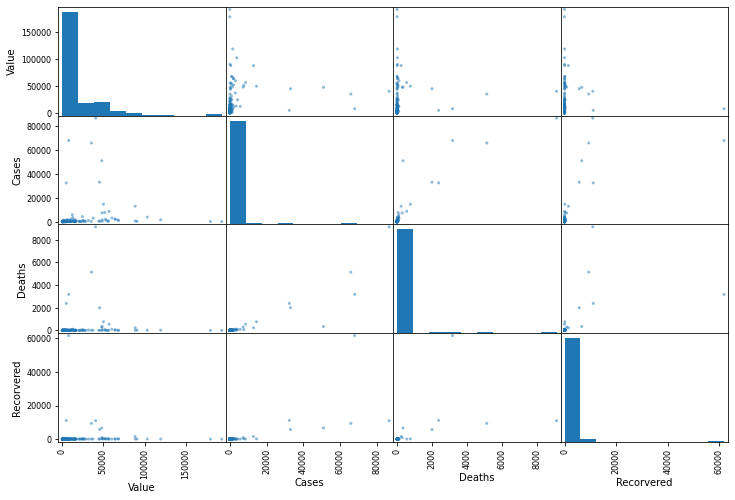

In [0]:
pd.plotting.scatter_matrix(all, figsize=(12,8) )


Postaram się teraz przewidzieć za pomocą prostej liniowej regresji jak będzie rosła liczba śmierci wrac z liczbą zakażeń

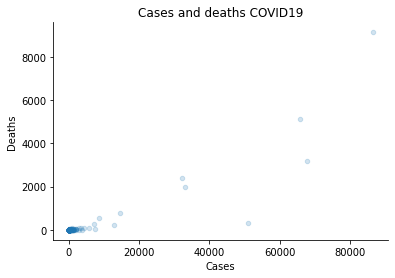

In [0]:
X = np.c_[all["Cases"]]
y = np.c_[all["Deaths"]]
all.plot(kind="scatter", x ="Cases", y = "Deaths",alpha = 0.2, title="Cases and deaths COVID19", legend=True )
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

In [0]:
reg = LinearRegression().fit(X, y)
X_new = [[70000]]
print(int(reg.predict(X_new)))

4917
